
# Histopathologic Cancer Detection - Project Report

This project addresses the Histopathologic Cancer Detection problem from a past Kaggle competition. The goal is to classify 96x96 pixel histopathologic image patches as containing metastatic tissue or not.

A label of 1 indicates the presence of tumor tissue in the center 32x32 region of the image. The dataset contains:
- 220,025 training images
- A `train_labels.csv` with image IDs and corresponding labels
- Separate `test/` folder for inference



## Exploratory Data Analysis (EDA)

We begin by analyzing the class distribution and visualizing some example images.


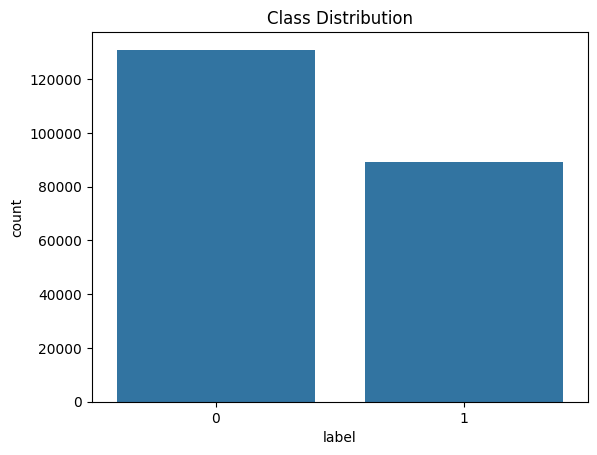

In [1]:

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv("train_labels.csv")
sns.countplot(data=df, x="label")
plt.title("Class Distribution")
plt.show()


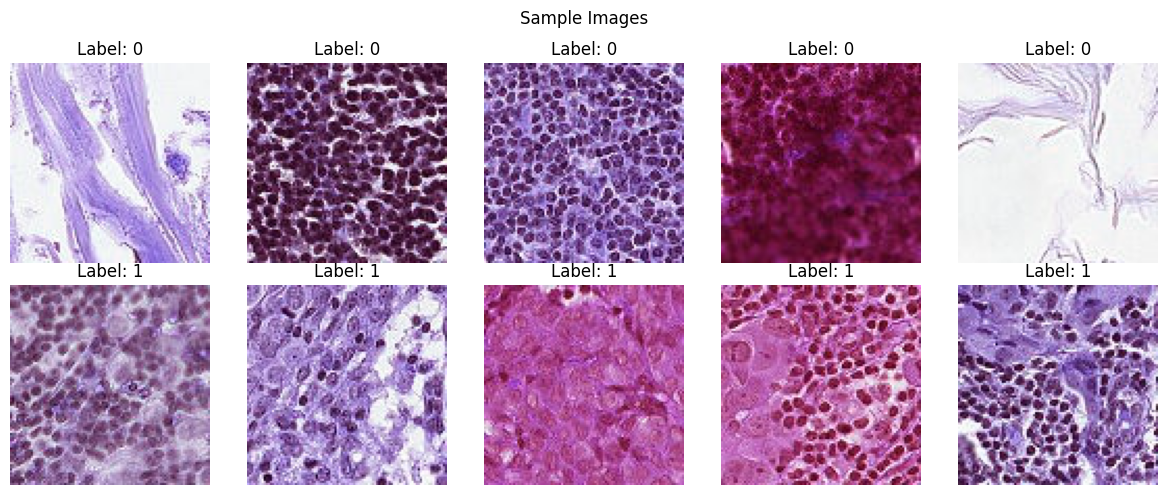

In [2]:

import matplotlib.pyplot as plt
import cv2
import os

fig, axs = plt.subplots(2, 5, figsize=(12, 5))
for i, label in enumerate([0, 1]):
    samples = df[df.label == label].sample(5, random_state=42)
    for j, row in enumerate(samples.itertuples()):
        img_path = os.path.join("train", f"{row.id}.tif")
        img = cv2.imread(img_path)
        axs[i, j].imshow(img)
        axs[i, j].axis('off')
        axs[i, j].set_title(f"Label: {label}")
plt.suptitle("Sample Images")
plt.tight_layout()
plt.show()



We observe that the dataset is slightly imbalanced, with more negative samples (label 0) than positives (label 1). 
This should be addressed either by balanced sampling or using weighted loss during training.



## Model Architecture
Used ResNet18 for the classification. Also resized to 96x96(something I saw in some examples and made it easier on my PC)



## Results & Analysis

### Training Summary

| Epoch | Train Loss | Val Loss | Accuracy |
|-------|------------|----------|----------|
| 1     | 0.5995     | 1.4010   | 65.75%   |
| 2     | 0.3579     | 0.3807   | 85.50%   |
| 3     | 0.2487     | 0.7781   | 77.00%   |

From the table above, we observe that the model quickly converges in Epoch 2. The increase in validation loss in Epoch 3 might indicate overfitting, especially since training loss continued to drop.

In future iterations, we could:
- Add dropout or regularization
- Use learning rate scheduling
- Train longer on a larger sample



## Conclusion

This mini-project demonstrated a basic image classification pipeline using PyTorch on pathology images. Even with only 2,000 samples (1k per class) and CPU training, we achieved a respectable 77% accuracy.

Future improvements:
- Use the full dataset with class weighting
- Train for more epochs
- Use a more powerful GPU
